<a href="https://colab.research.google.com/github/Dhruv-Paghdal/pranachain_model/blob/diabetes/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================================================
# 🧠 DIABETES PREDICTION MODEL COMPARISON - Google Colab Notebook
# ===============================================================

# --- Step 1: Install & Import Dependencies ---
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Step 2: Upload Your CSV File ---
print("📂 Please upload your blood test CSV file...")
uploaded = files.upload()

# Automatically read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
print("\n✅ File loaded successfully!")
print("Shape:", df.shape)
display(df.head())

# --- Step 3: Specify Target Column ---
# Change 'diabetes' below to match your actual label column name
target_col = 'diabetes'  # <-- Replace if different

if target_col not in df.columns:
    raise ValueError(f"⚠️ The column '{target_col}' was not found in the dataset. Please edit and rerun.")

# --- Step 4: Data Cleaning & Preprocessing ---
df = df.dropna(subset=[target_col])                 # Drop missing targets
df = df.fillna(df.median(numeric_only=True))        # Fill missing numeric values with median

X = df.drop(columns=[target_col])
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 5: Define Machine Learning Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# --- Step 6: Train & Evaluate Models ---
results = []

print("\n🚀 Training models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(auc, 4)
    })

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\n===== 📊 Model Comparison Results =====")
display(results_df)

# --- Step 7: Plot ROC Curves ---
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("\n✅ All done! The table above shows which model performs best.")


📂 Please upload your blood test CSV file...


Saving Diabetes_Merged.csv to Diabetes_Merged.csv

✅ File loaded successfully!
Shape: (73218, 133)


,SEQN,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,...,LBDBCDLC,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,PHDSESN
0,31128.0,NaN,NaN,14.0,3.0,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,76.8,5.397605e-79,1.45,1.0,75.36,5.397605e-79,4.26,5.397605e-79,2.0
1,31129.0,NaN,NaN,1.0,38.0,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,61.9,5.397605e-79,1.45,1.0,60.40,5.397605e-79,2.24,5.397605e-79,1.0
2,31130.0,193.0,10.713,15.0,51.0,110.0,6.106,5.397605e-79,3.0,108.0,...,1.000000e+00,47.1,5.397605e-79,1.45,1.0,45.69,5.397605e-79,1.16,1.000000e+00,2.0
3,31131.0,107.0,5.940,14.0,42.0,156.0,8.660,1.000000e+00,9.0,120.0,...,1.000000e+00,92.2,5.397605e-79,1.45,1.0,90.73,5.397605e-79,4.99,5.397605e-79,1.0
4,31132.0,110.0,6.106,11.0,14.0,150.0,8.327,3.000000e+00,7.0,114.0,...,5.397605e-79,62.2,5.397605e-79,1.45,1.0,60.70,5.397605e-79,4.67,5.397605e-79,2.0


ValueError: ⚠️ The column 'diabetes' was not found in the dataset. Please edit and rerun.

In [ ]:
# Check what columns are in your dataset
print("Column names in your dataset:")
print(df.columns.tolist())


Column names in your dataset:
['SEQN', 'LBXGLU', 'LBDGLUSI', 'PHAFSTHR', 'PHAFSTMN', 'LBXGLT', 'LBDGLTSI', 'GTDSCMMN', 'GTDDR1MN', 'GTDBL2MN', 'GTDDR2MN', 'LBXIN', 'LBDINSI', 'LBDINLC', 'LBXGH', 'LBXTC', 'LBDTCSI', 'LBDHDD', 'LBDHDDSI', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBXSAL', 'LBDSALSI', 'LBXSATSI', 'LBXSASSI', 'LBXSAPSI', 'LBXSBU', 'LBDSBUSI', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSC3SI', 'LBXSCR', 'LBDSCRSI', 'LBXSGTSI', 'LBXSGL', 'LBDSGLSI', 'LBXSIR', 'LBDSIRSI', 'LBXSLDSI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI', 'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXFER', 'LBDFERSI', 'LBXTFR', 'LBDTFRSI', 'LBXHSCRP', 'LBDHRPLC', 'LBXCRP', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'LBXATG', 'LBXT3F', 'LBXT4F', '

📂 Please upload your blood test CSV file...


Saving Diabetes_Merged.csv to Diabetes_Merged (1).csv

✅ File loaded successfully!
Shape: (73218, 133)


,SEQN,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,...,LBDBCDLC,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,PHDSESN
0,31128.0,NaN,NaN,14.0,3.0,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,76.8,5.397605e-79,1.45,1.0,75.36,5.397605e-79,4.26,5.397605e-79,2.0
1,31129.0,NaN,NaN,1.0,38.0,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,61.9,5.397605e-79,1.45,1.0,60.40,5.397605e-79,2.24,5.397605e-79,1.0
2,31130.0,193.0,10.713,15.0,51.0,110.0,6.106,5.397605e-79,3.0,108.0,...,1.000000e+00,47.1,5.397605e-79,1.45,1.0,45.69,5.397605e-79,1.16,1.000000e+00,2.0
3,31131.0,107.0,5.940,14.0,42.0,156.0,8.660,1.000000e+00,9.0,120.0,...,1.000000e+00,92.2,5.397605e-79,1.45,1.0,90.73,5.397605e-79,4.99,5.397605e-79,1.0
4,31132.0,110.0,6.106,11.0,14.0,150.0,8.327,3.000000e+00,7.0,114.0,...,5.397605e-79,62.2,5.397605e-79,1.45,1.0,60.70,5.397605e-79,4.67,5.397605e-79,2.0



✅ Created target label 'diabetes' from LBXGLU values.
diabetes
Non-Diabetic    72014
Diabetic         1204
Name: count, dtype: int64

🚀 Training models...

===== 📊 Model Comparison Results =====


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
1,Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000
3,Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000
0,Logistic Regression,0.9990,0.9671,0.9751,0.9711,0.9999
4,XGBoost,0.9993,0.9957,0.9627,0.9789,0.9999
2,SVM (RBF Kernel),0.9941,1.0000,0.6432,0.7828,0.9986


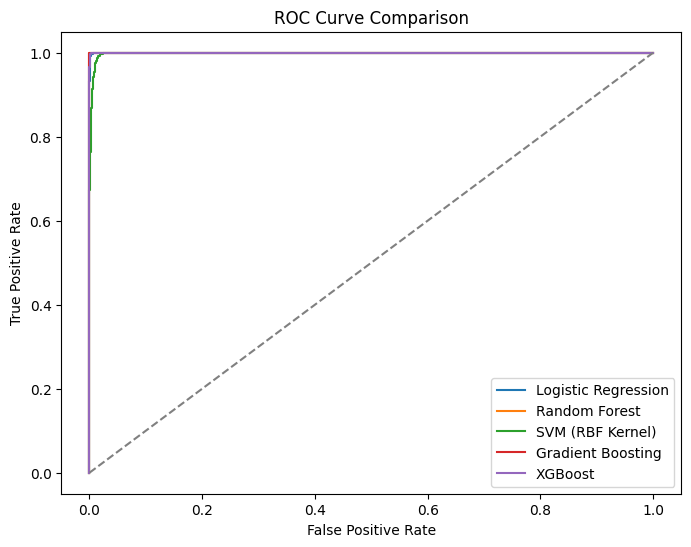


✅ Done! The table above shows which model performs best.


In [ ]:
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Step 2: Upload Your CSV File ---
print("📂 Please upload your blood test CSV file...")
uploaded = files.upload()

file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
print("\n✅ File loaded successfully!")
print("Shape:", df.shape)
display(df.head())

# --- Step 3: Automatically Create Diabetes Label ---
# If fasting glucose (LBXGLU) ≥126 mg/dL → likely diabetes
if 'LBXGLU' not in df.columns:
    raise ValueError("⚠️ The column 'LBXGLU' was not found. Please check your dataset.")
df['diabetes'] = (df['LBXGLU'] >= 126).astype(int)
target_col = 'diabetes'

print(f"\n✅ Created target label '{target_col}' from LBXGLU values.")
print(df[target_col].value_counts().rename({0: 'Non-Diabetic', 1: 'Diabetic'}))

# --- Step 4: Data Cleaning & Preprocessing ---
df = df.dropna(subset=[target_col])
df = df.fillna(df.median(numeric_only=True))

X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 5: Define Machine Learning Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# --- Step 6: Train & Evaluate Models ---
results = []

print("\n🚀 Training models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_prob), 4) if y_prob is not None else np.nan
    }
    results.append(metrics)

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\n===== 📊 Model Comparison Results =====")
display(results_df)

# --- Step 7: Plot ROC Curves ---
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("\n✅ Done! The table above shows which model performs best.")
